In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
team_data = pd.read_csv('/content/team_game_data.csv')


##Team data for the regular season starts from 18 October to 9 April##
team_data['GD'] = pd.to_datetime(team_data['GD'], format = '%d-%b-%y')
start = pd.to_datetime('18-OCT-22', format = '%d-%b-%y')
end = pd.to_datetime('9-APR-23', format = '%d-%b-%y')
temp = team_data[(team_data['GD'] >= start)& (team_data['GD'] <= end)]
regular_season = temp.sort_values('GD')
regular_season.POINTS.value_counts()

#from describe the average league points during the season is 114.685772
regular_season.POINTS.describe()

#most points scored over a regular season game
maximum_points = 0
regular_season.loc[(team_data.POINTS == regular_season.POINTS.max())] #Sacramento Kings 176 points against LA Clippers 175 on 24 February 2023


,GAME_CODE,TEAM_ID,TEAM,OPP_TEAM_ID,OPP,GD,FIELD_GOALS_MADE,FIELD_GOALS_ATT,THREE_POINT_MADE,THREE_POINT_ATT,...,POINTS,TOTAL_REBOUNDS,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,ASSISTS,STEALS,BLOCKS,TURNOVERS,PERSONAL_FOULS,OUTCOME
2368,2484911,23,Sacramento Kings,12,Los Angeles Clippers,2023-02-24,65,111,18,41,...,176,43,12,31,33,18,3,15,28,W


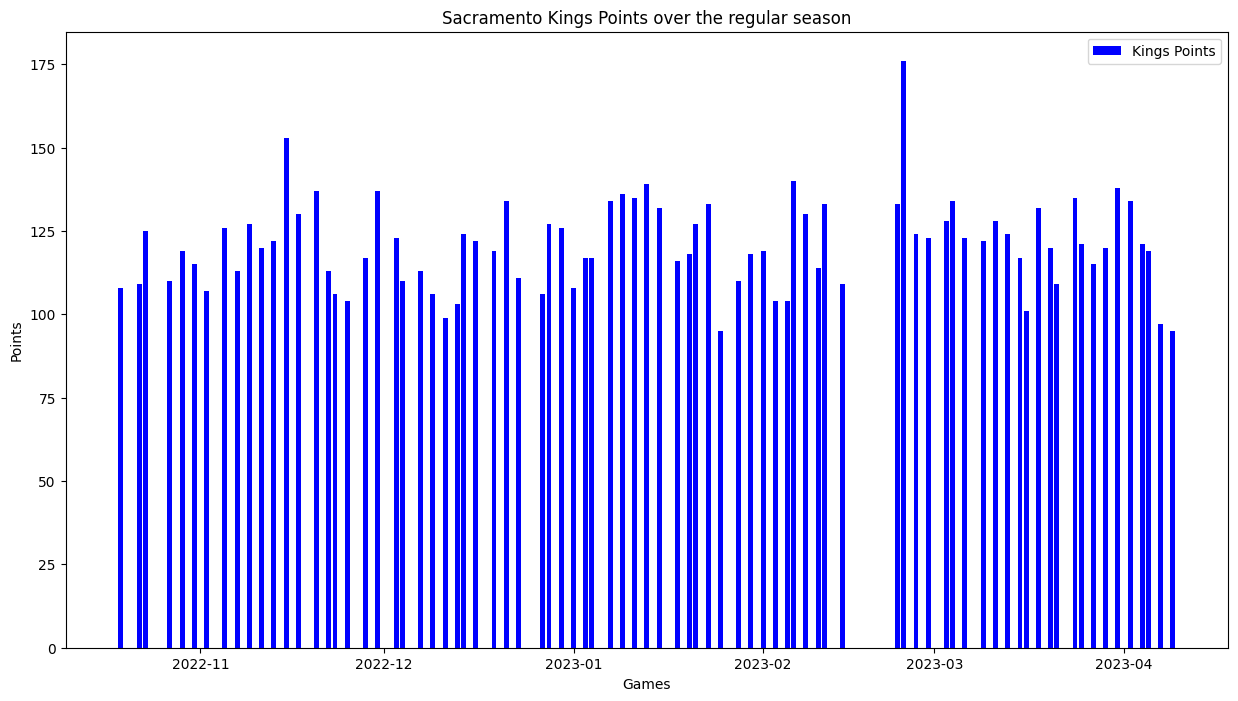

array([[<Axes: title={'center': 'POINTS'}>]], dtype=object)

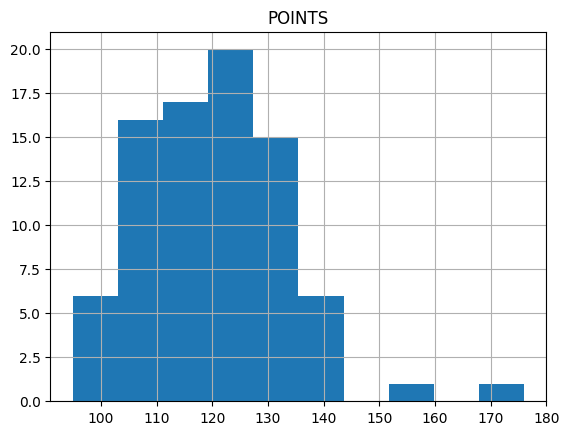

In [ ]:
#team with the best average points in the league across the season
team_averages = regular_season.groupby('TEAM').POINTS.mean() #This gives me all the teams, the best average is 120.707317 by the SACRAMENTO KINGS

#Now let's see how they played over the course of the season
Sacramento_Kings= regular_season.loc[regular_season.TEAM == 'Sacramento Kings']

plt.figure(figsize=(15,8))
plt.bar(Sacramento_Kings.GD, Sacramento_Kings.POINTS, color = 'blue')
plt.xlabel('Games')
plt.ylabel('Points')
plt.title('Sacramento Kings Points over the regular season')
plt.legend(['Kings Points', 'Gameweek Average'])
plt.show()
#plt.plot(regular_season.groupby('GD').GD, regular_season.groupby('GD').POINTS.mean(), color= 'green')

Sacramento_Kings.hist('POINTS')


In [ ]:
team_data.head()

,GAME_CODE,TEAM_ID,TEAM,OPP_TEAM_ID,OPP,GD,FIELD_GOALS_MADE,FIELD_GOALS_ATT,THREE_POINT_MADE,THREE_POINT_ATT,...,POINTS,TOTAL_REBOUNDS,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,ASSISTS,STEALS,BLOCKS,TURNOVERS,PERSONAL_FOULS,OUTCOME
0,2484648,29,Memphis Grizzlies,26,Utah Jazz,2023-02-15,43,107,14,40,...,117,46,17,29,24,13,9,4,21,W
1,2484649,25,Oklahoma City Thunder,21,Phoenix Suns,2023-04-02,36,88,11,32,...,118,41,13,28,21,7,0,8,23,L
2,2484385,5,Cleveland Cavaliers,14,Miami Heat,2023-03-10,40,86,18,43,...,115,34,8,26,25,5,6,11,20,L
3,2484937,27,Washington Wizards,1,Atlanta Hawks,2023-03-10,43,88,7,27,...,107,43,7,36,27,8,6,14,17,L
4,2484649,21,Phoenix Suns,25,Oklahoma City Thunder,2023-04-02,46,81,13,34,...,128,38,5,33,31,4,6,13,30,W


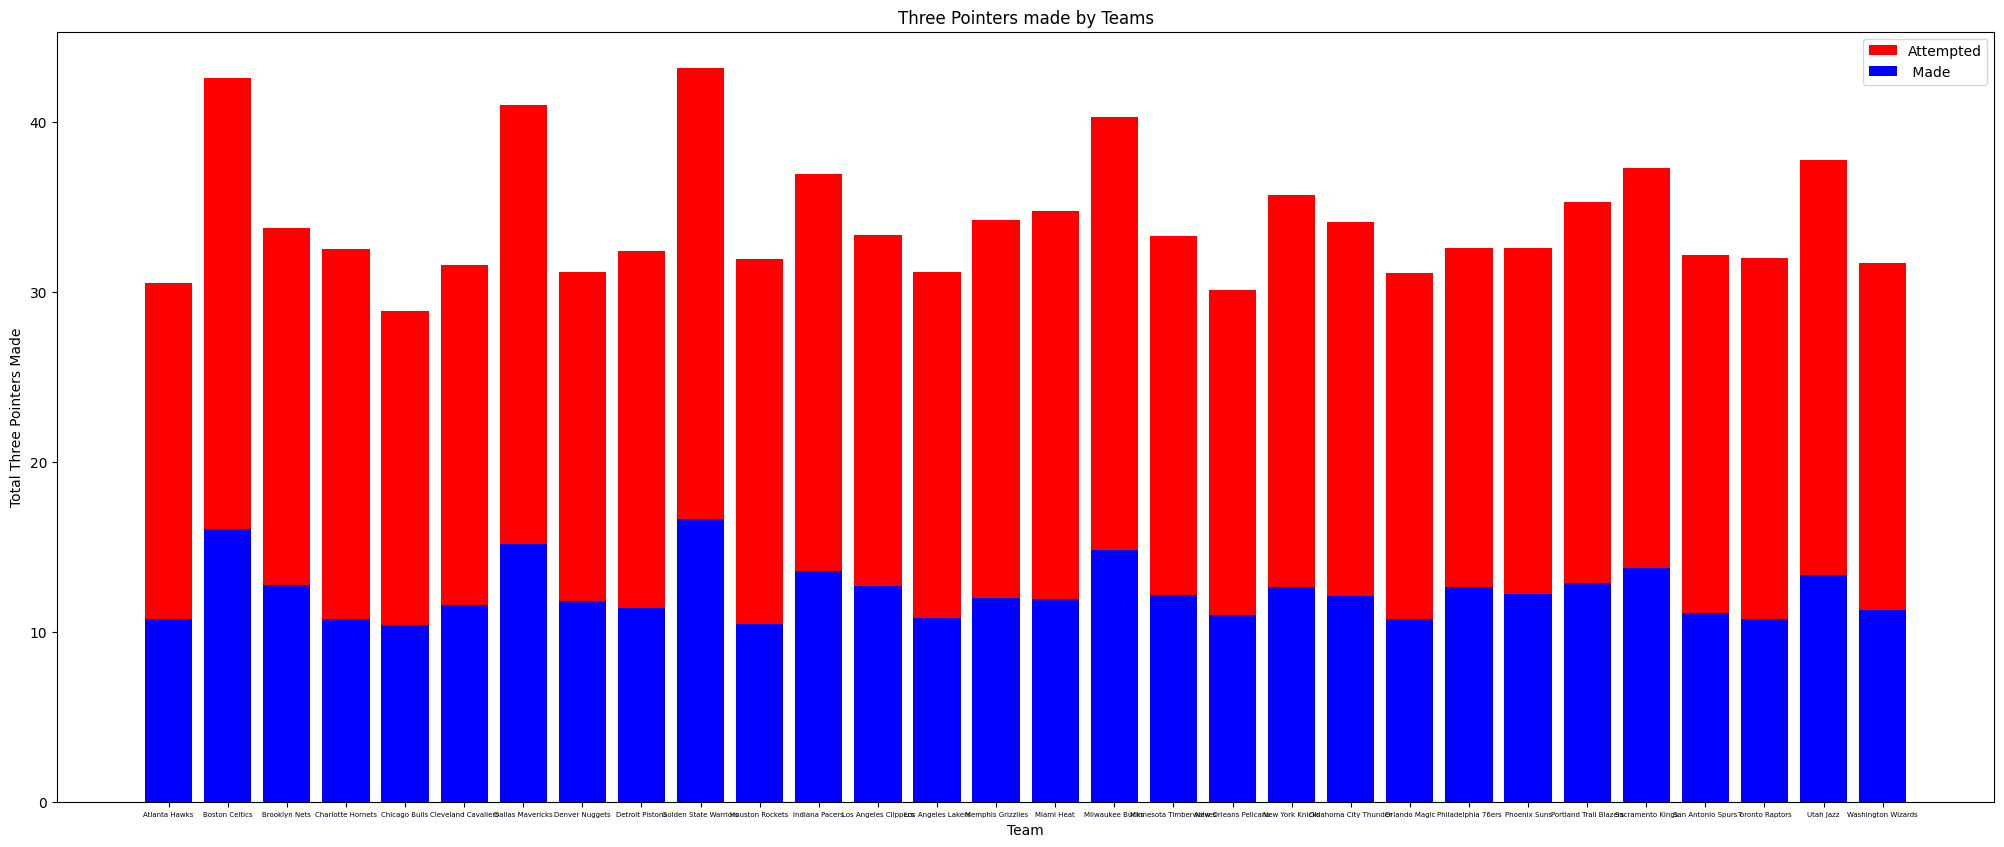

TEAM
Atlanta Hawks             10.756098
Boston Celtics            16.036585
Brooklyn Nets             12.780488
Charlotte Hornets         10.743902
Chicago Bulls             10.414634
Cleveland Cavaliers       11.585366
Dallas Mavericks          15.195122
Denver Nuggets            11.817073
Detroit Pistons           11.390244
Golden State Warriors     16.621951
Houston Rockets           10.439024
Indiana Pacers            13.560976
Los Angeles Clippers      12.695122
Los Angeles Lakers        10.792683
Memphis Grizzlies         12.012195
Miami Heat                11.951220
Milwaukee Bucks           14.841463
Minnesota Timberwolves    12.158537
New Orleans Pelicans      10.963415
New York Knicks           12.646341
Oklahoma City Thunder     12.134146
Orlando Magic             10.768293
Philadelphia 76ers        12.621951
Phoenix Suns              12.207317
Portland Trail Blazers    12.878049
Sacramento Kings          13.756098
San Antonio Spurs         11.109756
Toronto Raptors        

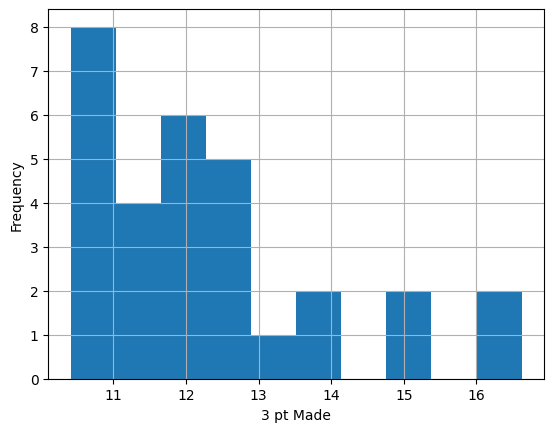

In [ ]:
#Who are the best teams by 3point scores over the regular season
tp = regular_season.groupby('TEAM').THREE_POINT_MADE.mean() #The Golden State Warriors scores the most 3 pointers on average: 16.621951 ; 1363 in Total
regular_season.groupby('TEAM').THREE_POINT_MADE.sum()
regular_season.groupby('TEAM').THREE_POINT_MADE.sum()/regular_season.groupby('TEAM').THREE_POINT_ATT.sum() *100

#The Philadelphia 76ers have the highest perecentage effociency 3 point shots made but only just ahead of the warriors : 38.691589%
#The 2 graphs
teams = regular_season.groupby('TEAM').TEAM.unique().apply(lambda x: x[0])

plt.figure(figsize=(25,10))
plt.bar(teams,regular_season.groupby('TEAM').THREE_POINT_ATT.mean(), color = 'red' )
plt.bar(teams, regular_season.groupby('TEAM').THREE_POINT_MADE.mean(), color = 'blue' )
plt.legend(['Attempted', ' Made'])
plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.ylabel('Total Three Pointers Made')
plt.title('Three Pointers made by Teams')
plt.show()
print(regular_season.groupby('TEAM').THREE_POINT_MADE.mean())

tp.hist()
plt.xlabel('3 pt Made')
plt.ylabel('Frequency')
plt.show()

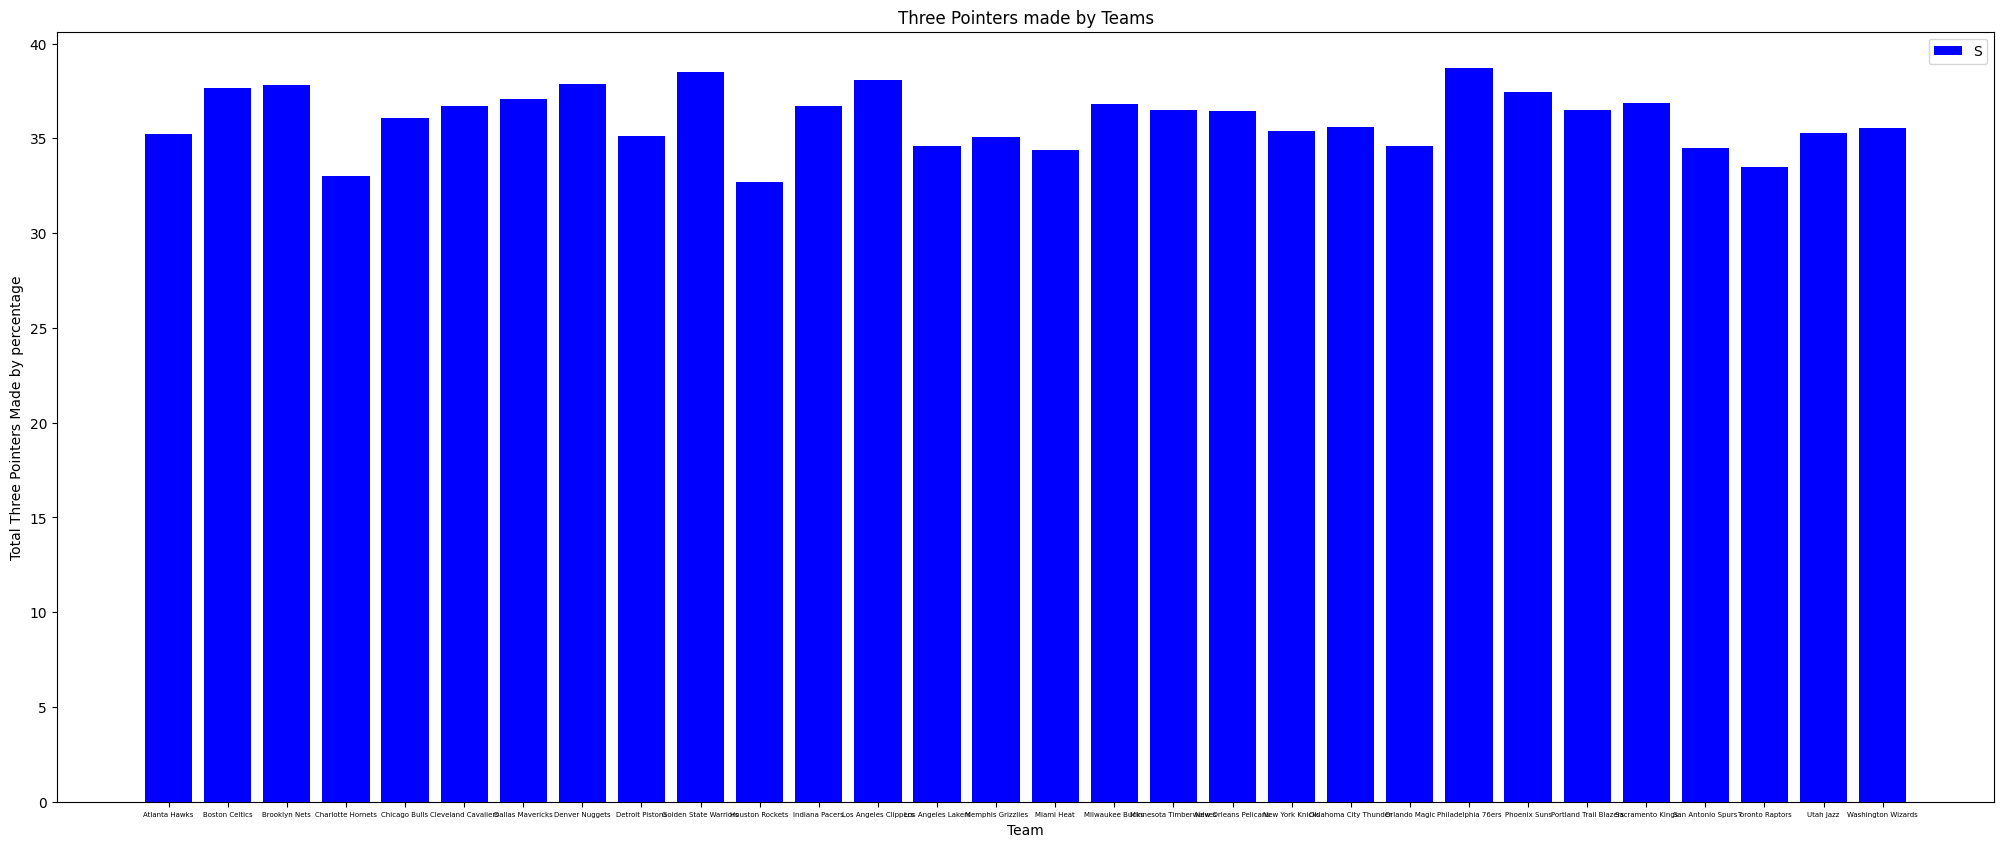

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(teams,regular_season.groupby('TEAM').THREE_POINT_MADE.sum()/regular_season.groupby('TEAM').THREE_POINT_ATT.sum() *100, color = 'blue' )
plt.legend('Successful')

plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.ylabel('Total Three Pointers Made by percentage')
plt.title('Three Pointers made by Teams')
plt.show()

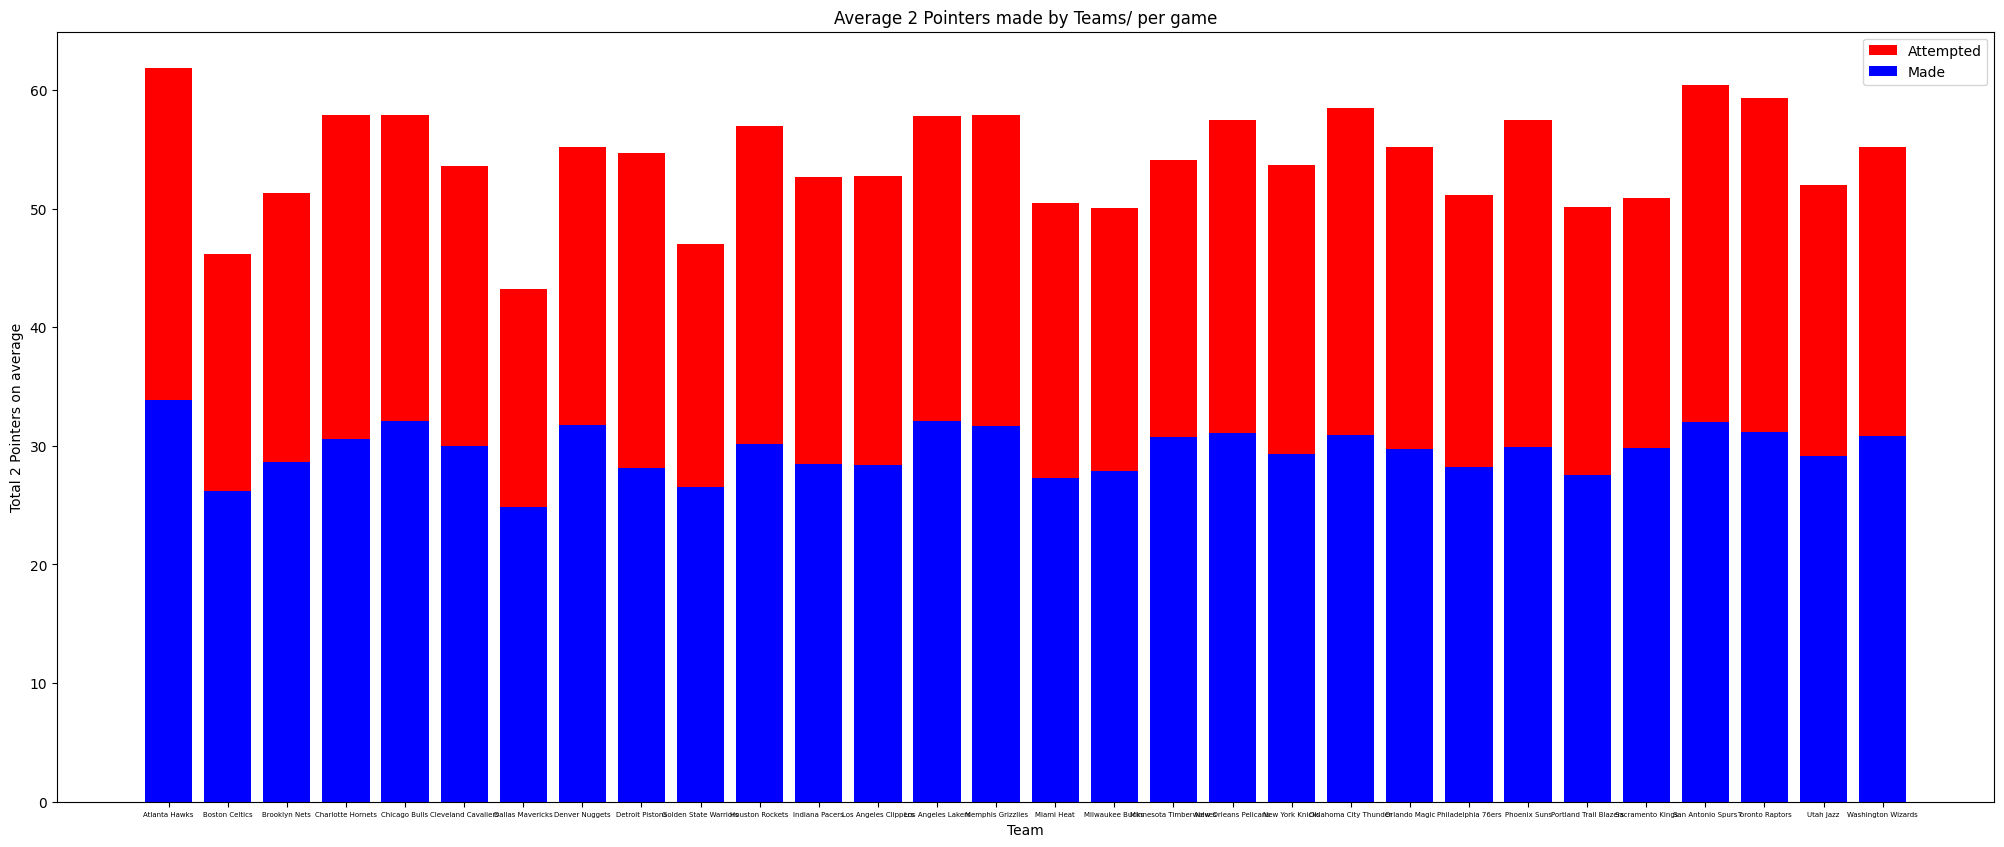

TEAM
Atlanta Hawks             33.853659
Boston Celtics            26.158537
Brooklyn Nets             28.670732
Charlotte Hornets         30.536585
Chicago Bulls             32.121951
Cleveland Cavaliers       29.975610
Dallas Mavericks          24.841463
Denver Nuggets            31.768293
Detroit Pistons           28.170732
Golden State Warriors     26.524390
Houston Rockets           30.158537
Indiana Pacers            28.439024
Los Angeles Clippers      28.402439
Los Angeles Lakers        32.085366
Memphis Grizzlies         31.707317
Miami Heat                27.256098
Milwaukee Bucks           27.890244
Minnesota Timberwolves    30.707317
New Orleans Pelicans      31.073171
New York Knicks           29.353659
Oklahoma City Thunder     30.951220
Orlando Magic             29.756098
Philadelphia 76ers        28.195122
Phoenix Suns              29.902439
Portland Trail Blazers    27.573171
Sacramento Kings          29.817073
San Antonio Spurs         31.975610
Toronto Raptors        

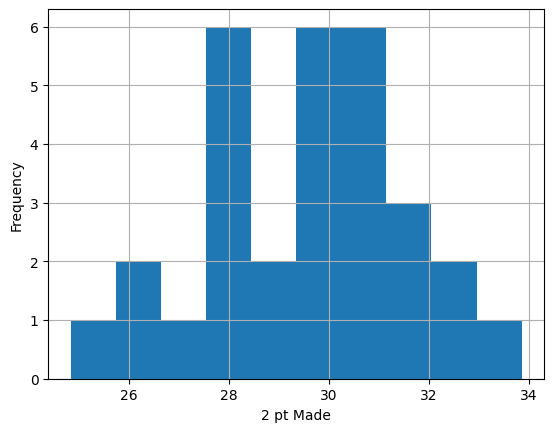

In [ ]:
#I will get 2 pointers by subtracting 3 pointers from field goals
regular_season.groupby('TEAM').FIELD_GOALS_MADE.mean() - regular_season.groupby('TEAM').THREE_POINT_MADE.mean() #Atlanta Hawks lead the way

#How about the percentage of 2 pointers made as a perecentage
two_pt_made = regular_season.groupby('TEAM').FIELD_GOALS_MADE.mean()- regular_season.groupby('TEAM').THREE_POINT_MADE.mean()
total = regular_season.groupby('TEAM').FIELD_GOALS_ATT.mean() - regular_season.groupby('TEAM').THREE_POINT_ATT.mean()


plt.figure(figsize=(25,10))
plt.bar(teams,total, color = 'red' )
plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.bar(teams, two_pt_made, color = 'blue' )
plt.legend(['Attempted','Made'])
plt.ylabel('Total 2 Pointers on average')
plt.title('Average 2 Pointers made by Teams/ per game')
plt.show()
print(two_pt_made)
two_pt_made.hist()
plt.xlabel('2 pt Made')
plt.ylabel('Frequency')
plt.show()

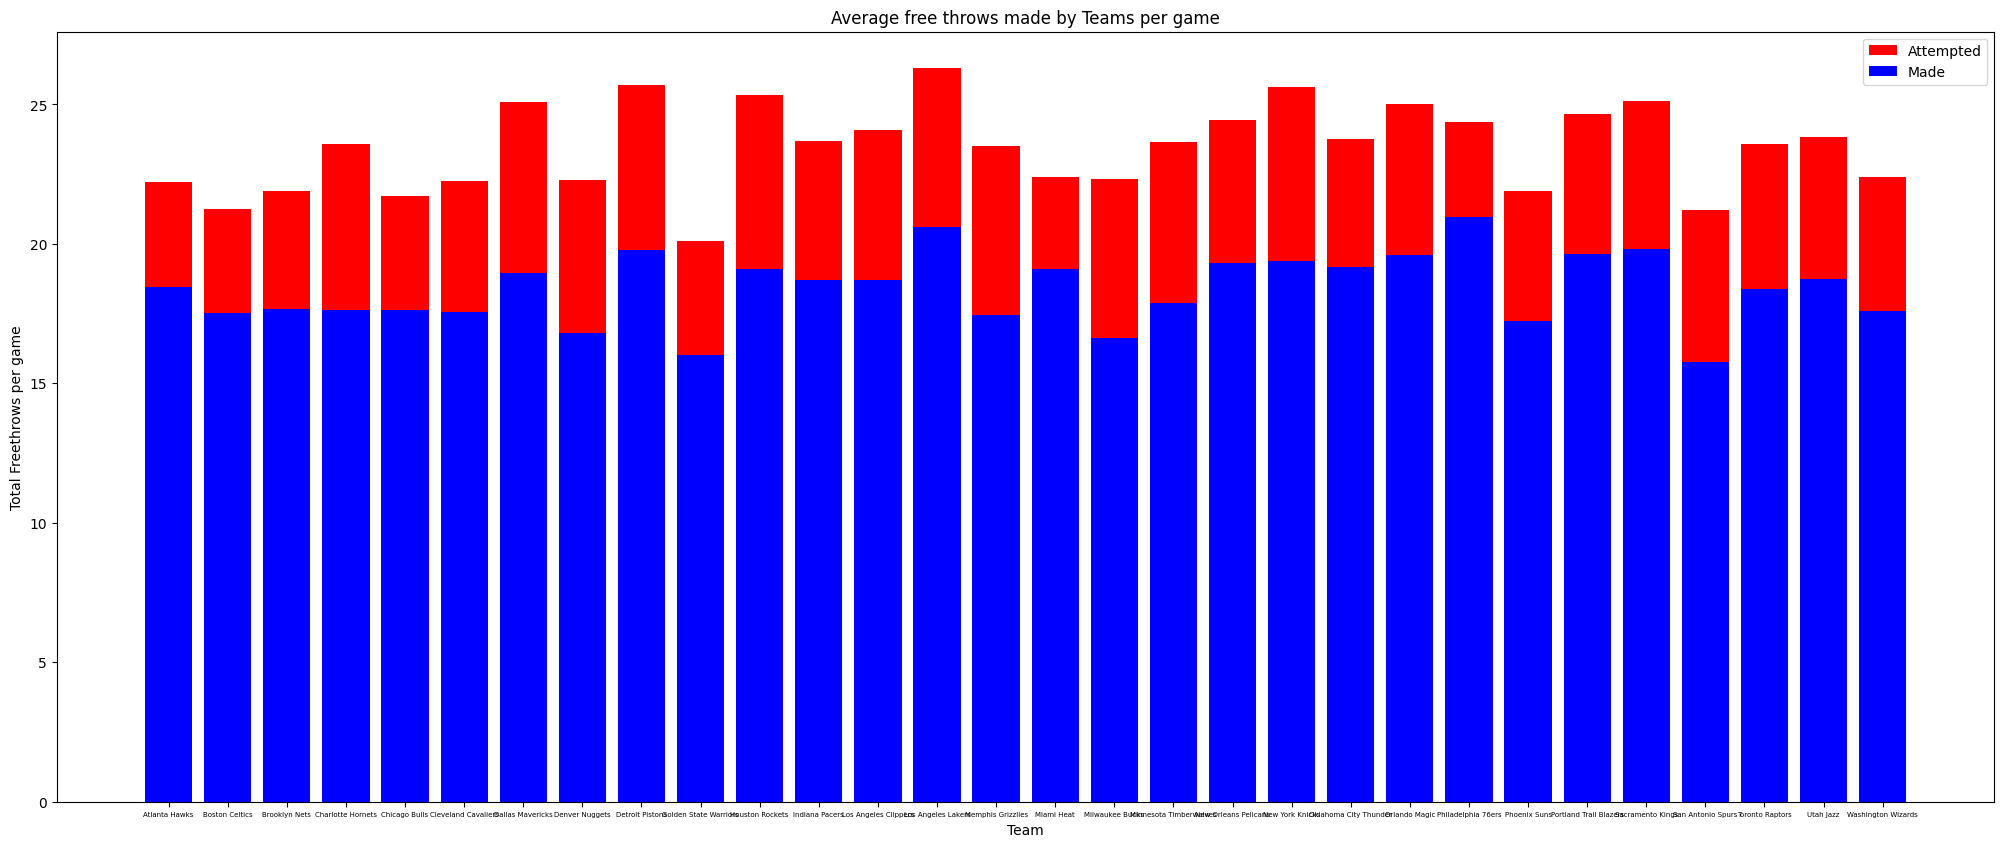

TEAM
Atlanta Hawks             18.451220
Boston Celtics            17.512195
Brooklyn Nets             17.670732
Charlotte Hornets         17.646341
Chicago Bulls             17.634146
Cleveland Cavaliers       17.548780
Dallas Mavericks          18.951220
Denver Nuggets            16.804878
Detroit Pistons           19.792683
Golden State Warriors     16.024390
Houston Rockets           19.109756
Indiana Pacers            18.719512
Los Angeles Clippers      18.695122
Los Angeles Lakers        20.621951
Memphis Grizzlies         17.463415
Miami Heat                19.109756
Milwaukee Bucks           16.634146
Minnesota Timberwolves    17.890244
New Orleans Pelicans      19.329268
New York Knicks           19.378049
Oklahoma City Thunder     19.170732
Orlando Magic             19.597561
Philadelphia 76ers        20.963415
Phoenix Suns              17.219512
Portland Trail Blazers    19.621951
Sacramento Kings          19.804878
San Antonio Spurs         15.756098
Toronto Raptors        

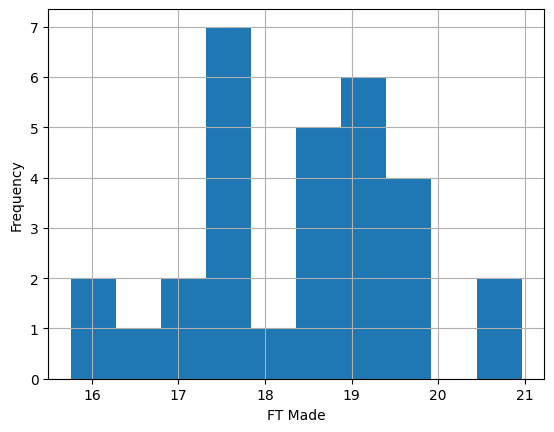

In [ ]:
##best freethrow by total per game and percentage##
ft_made = regular_season.groupby('TEAM').FREE_THROWS_MADE.mean() #76ERS WIN
ft_percentage = team_data.groupby('TEAM').FREE_THROWS_ATT.mean() #THE 76ERS WIN

#Let's see that on a graph

plt.figure(figsize=(25,10))
plt.bar(teams,ft_percentage, color = 'red' )
plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.bar(teams, ft_made, color = 'blue' )
plt.legend(['Attempted','Made'])
plt.ylabel('Total Freethrows per game')
plt.title('Average free throws made by Teams per game')
plt.show()
print(ft_made)
ft_made.hist()
plt.xlabel('FT Made')
plt.ylabel('Frequency')
plt.show()

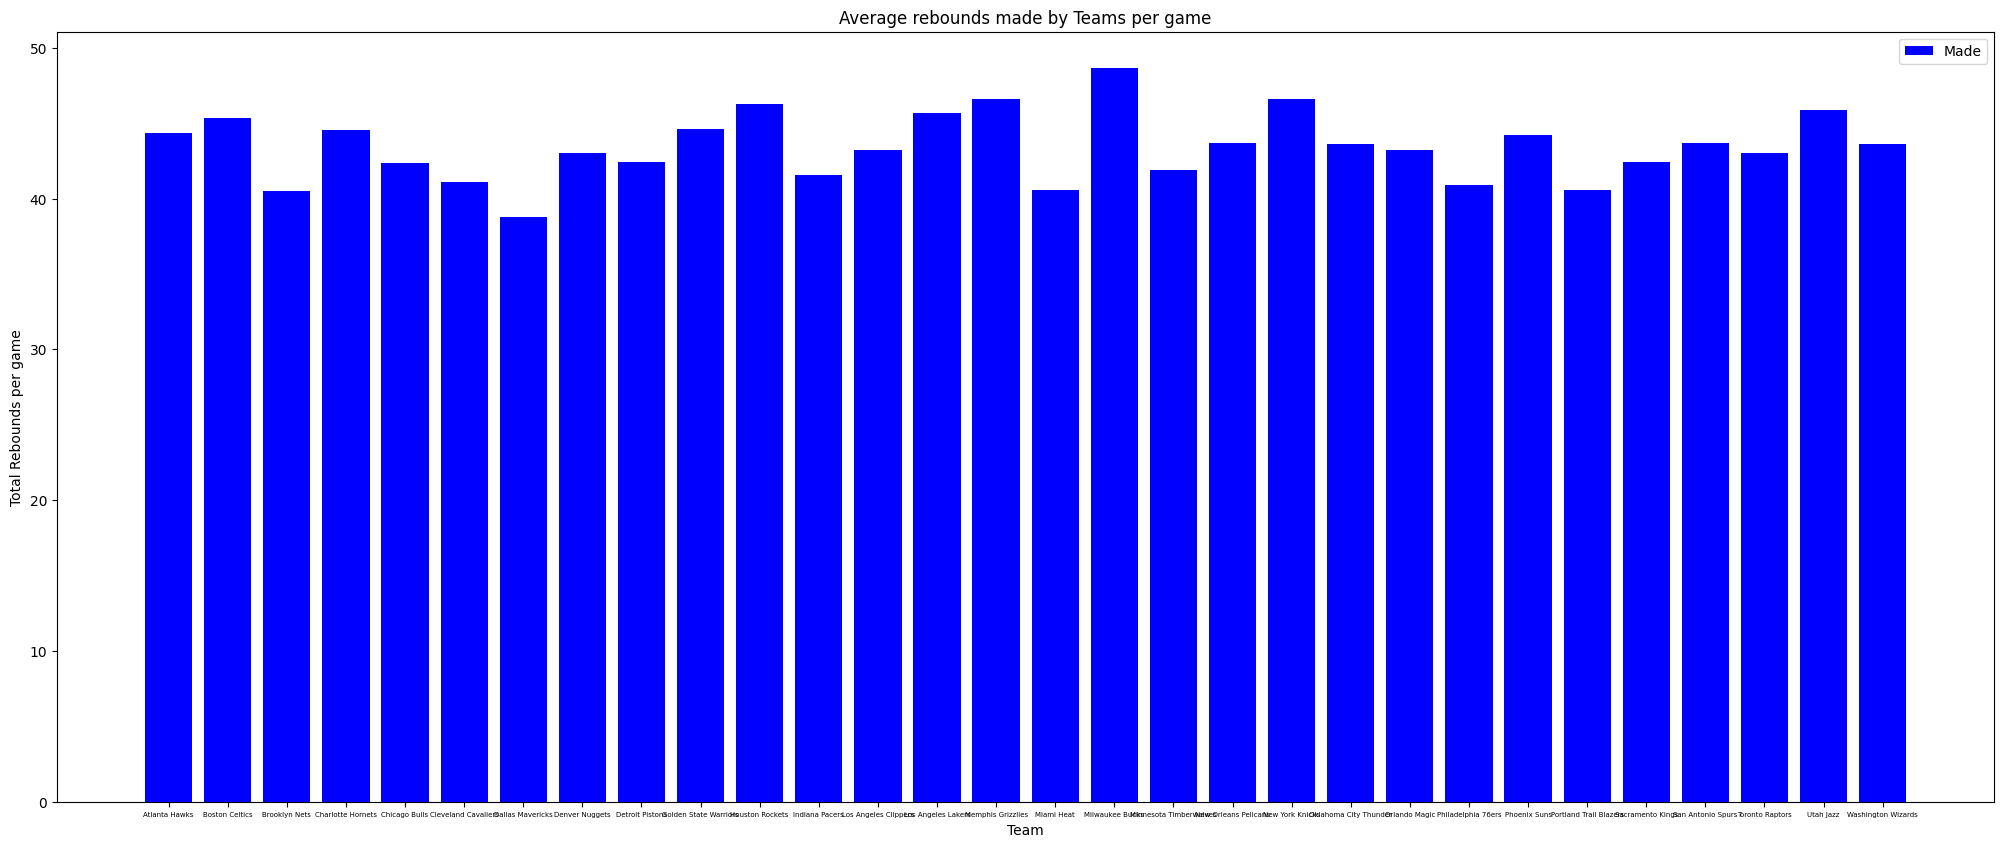

TEAM
Atlanta Hawks             44.378049
Boston Celtics            45.329268
Brooklyn Nets             40.512195
Charlotte Hornets         44.536585
Chicago Bulls             42.353659
Cleveland Cavaliers       41.085366
Dallas Mavericks          38.792683
Denver Nuggets            43.012195
Detroit Pistons           42.439024
Golden State Warriors     44.597561
Houston Rockets           46.280488
Indiana Pacers            41.548780
Los Angeles Clippers      43.231707
Los Angeles Lakers        45.707317
Memphis Grizzlies         46.621951
Miami Heat                40.597561
Milwaukee Bucks           48.634146
Minnesota Timberwolves    41.890244
New Orleans Pelicans      43.695122
New York Knicks           46.597561
Oklahoma City Thunder     43.646341
Orlando Magic             43.243902
Philadelphia 76ers        40.926829
Phoenix Suns              44.243902
Portland Trail Blazers    40.548780
Sacramento Kings          42.451220
San Antonio Spurs         43.707317
Toronto Raptors        

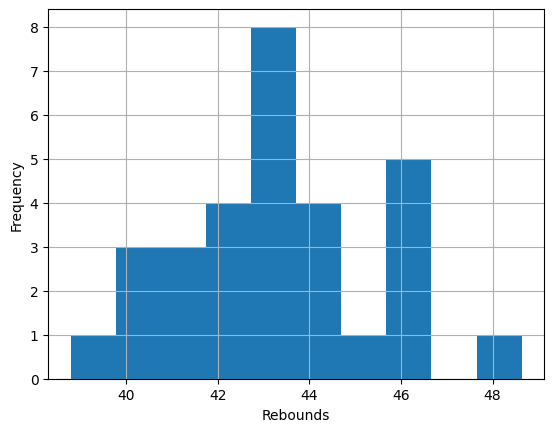

In [ ]:
#best rebounding team
rebounds = regular_season.groupby('TEAM').TOTAL_REBOUNDS.mean() #The Milwaukee Bucks take the crown with 48.634146 rebounds per game

#Let's see that on a graph

plt.figure(figsize=(25,10))
plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.bar(teams, rebounds, color = 'blue' )
plt.legend(['Made'])
plt.ylabel('Total Rebounds per game')
plt.title('Average rebounds made by Teams per game')
plt.show()
print(rebounds)

rebounds.hist()
plt.xlabel('Rebounds')
plt.ylabel('Frequency')
plt.show()

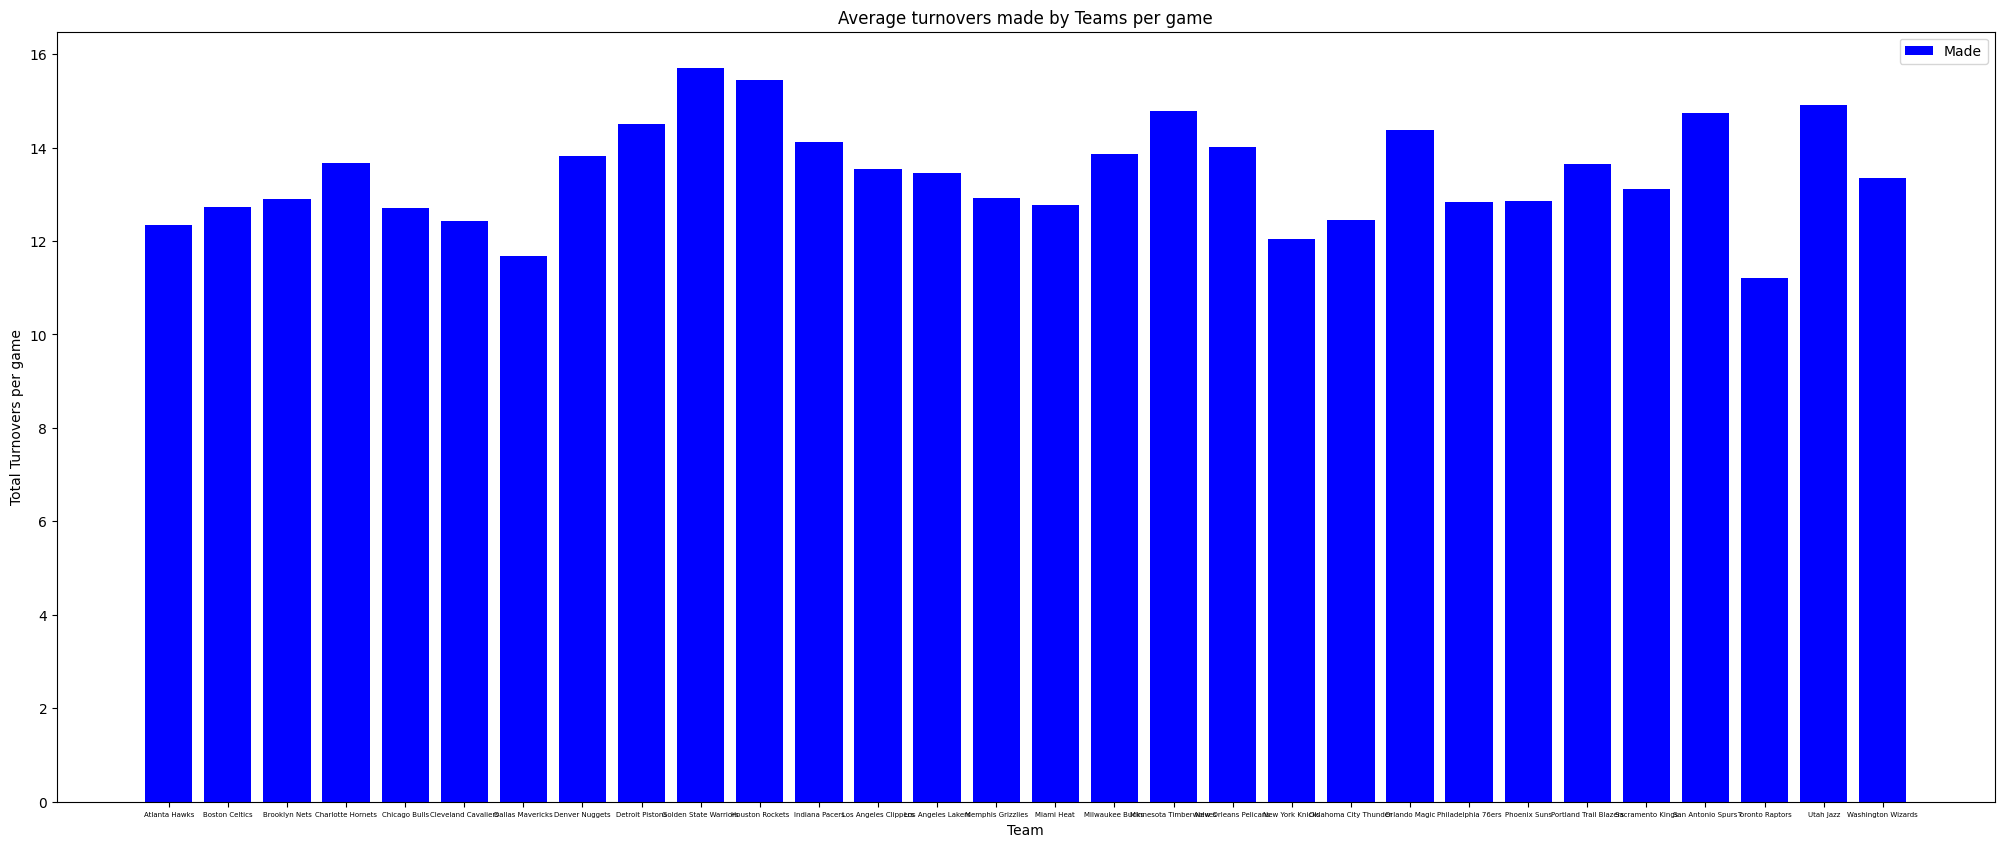

TEAM
Atlanta Hawks             12.353659
Boston Celtics            12.719512
Brooklyn Nets             12.890244
Charlotte Hornets         13.670732
Chicago Bulls             12.707317
Cleveland Cavaliers       12.439024
Dallas Mavericks          11.670732
Denver Nuggets            13.829268
Detroit Pistons           14.500000
Golden State Warriors     15.695122
Houston Rockets           15.451220
Indiana Pacers            14.109756
Los Angeles Clippers      13.536585
Los Angeles Lakers        13.463415
Memphis Grizzlies         12.926829
Miami Heat                12.768293
Milwaukee Bucks           13.865854
Minnesota Timberwolves    14.780488
New Orleans Pelicans      14.012195
New York Knicks           12.048780
Oklahoma City Thunder     12.451220
Orlando Magic             14.365854
Philadelphia 76ers        12.829268
Phoenix Suns              12.865854
Portland Trail Blazers    13.658537
Sacramento Kings          13.121951
San Antonio Spurs         14.731707
Toronto Raptors        

In [ ]:
#best turnover team
turnovers = regular_season.groupby('TEAM').TURNOVERS.mean() #Golden State Warriors with 15.695122 take the crown

#Let's see that on a graph

plt.figure(figsize=(25,10))
plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.bar(teams, turnovers, color = 'blue' )
plt.legend(['Made'])
plt.ylabel('Total Turnovers per game')
plt.title('Average turnovers made by Teams per game')
plt.show()
print(turnovers)

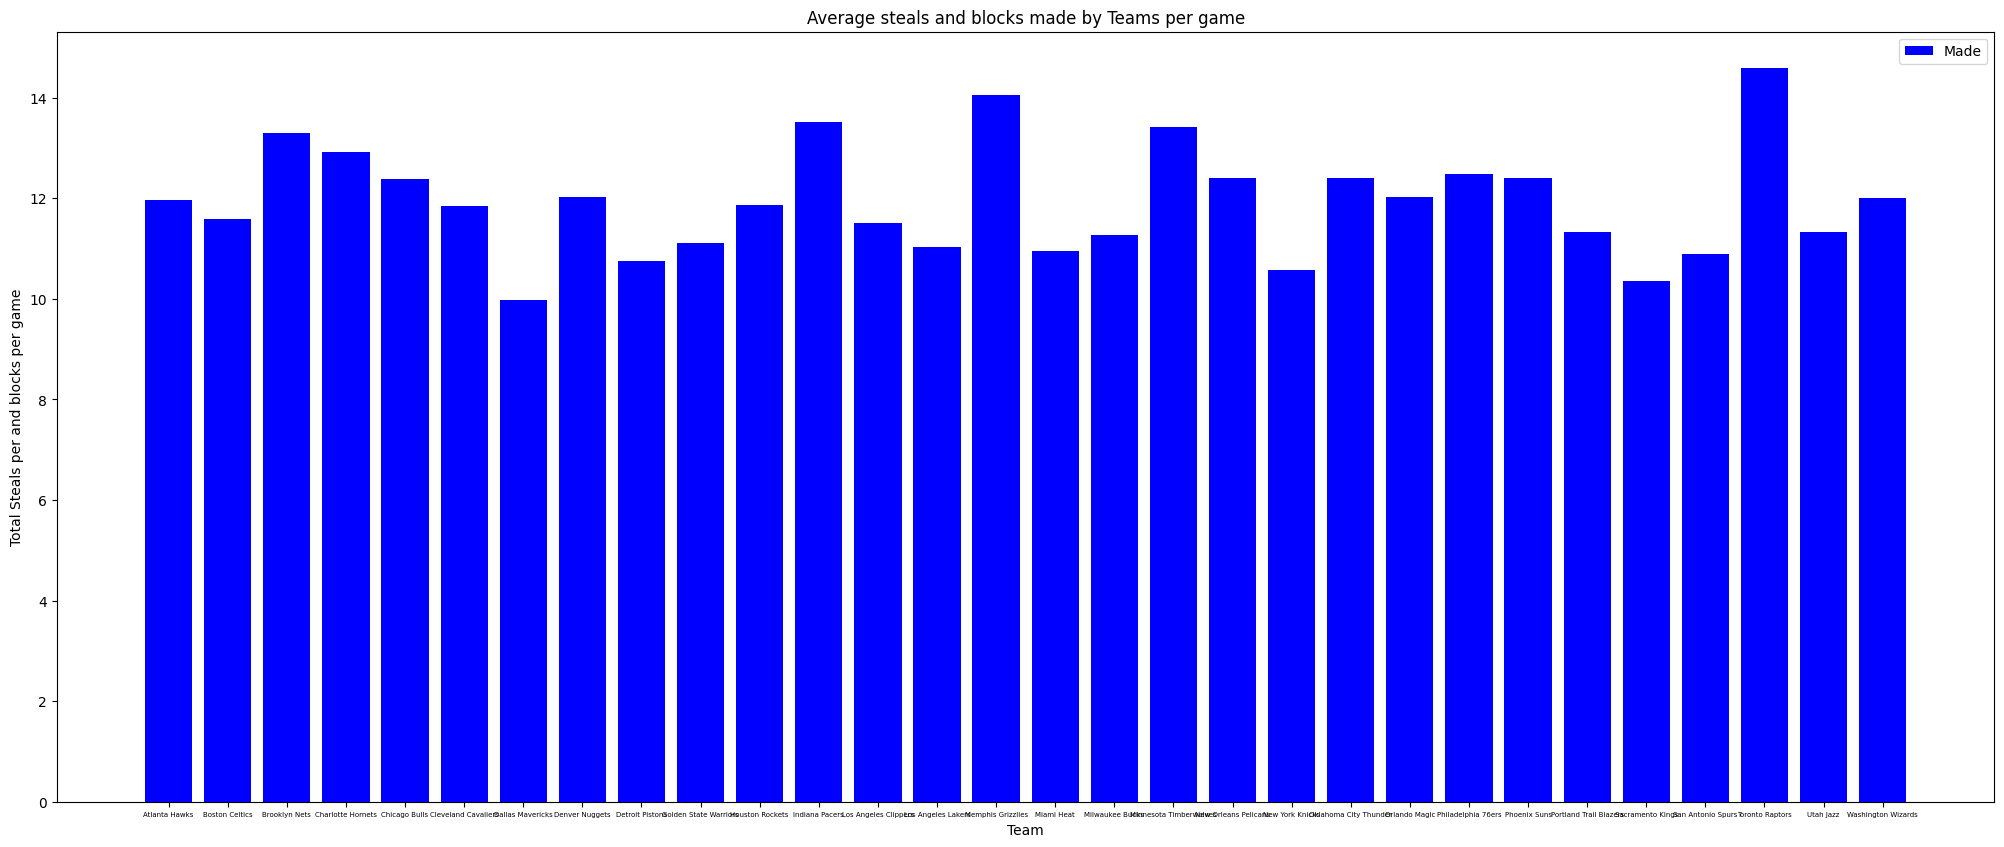

TEAM
Atlanta Hawks             11.963415
Boston Celtics            11.597561
Brooklyn Nets             13.304878
Charlotte Hornets         12.914634
Chicago Bulls             12.378049
Cleveland Cavaliers       11.841463
Dallas Mavericks           9.975610
Denver Nuggets            12.024390
Detroit Pistons           10.756098
Golden State Warriors     11.109756
Houston Rockets           11.878049
Indiana Pacers            13.524390
Los Angeles Clippers      11.512195
Los Angeles Lakers        11.024390
Memphis Grizzlies         14.060976
Miami Heat                10.951220
Milwaukee Bucks           11.268293
Minnesota Timberwolves    13.426829
New Orleans Pelicans      12.414634
New York Knicks           10.573171
Oklahoma City Thunder     12.402439
Orlando Magic             12.024390
Philadelphia 76ers        12.487805
Phoenix Suns              12.402439
Portland Trail Blazers    11.329268
Sacramento Kings          10.353659
San Antonio Spurs         10.902439
Toronto Raptors        

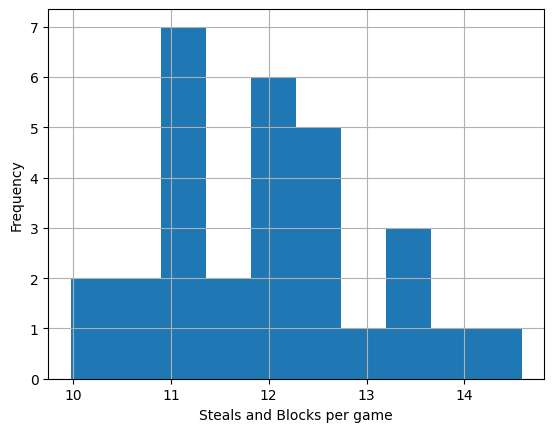

In [ ]:
#team with the most steals, and blocks
steals = regular_season.groupby('TEAM').STEALS.mean() + regular_season.groupby('TEAM').BLOCKS.mean() #Toronto Raptors win with about 14.585366

#Let's see that on a graph

plt.figure(figsize=(25,10))
plt.xlabel('Team')
plt.xticks(fontsize = 5)
plt.bar(teams, steals, color = 'blue' )
plt.legend(['Made'])
plt.ylabel('Total Steals per and blocks per game')
plt.title('Average steals and blocks made by Teams per game')
plt.show()
print(steals)

steals.hist()
plt.xlabel('Steals and Blocks per game')
plt.ylabel('Frequency')
plt.show()

In [ ]:
number_of_games = len(team_data.GAME_CODE.unique())

#average_points
average_points_per_game = team_data.POINTS.mean
average_points_per_team = team_data.groupby('TEAM').POINTS.mean()

#best 3 point shooting team by shots made and by percetage shots converted
team_data.groupby('TEAM').THREE_POINT_MADE.sum()
three_point = team_data.groupby('TEAM').THREE_POINT_MADE.sum()/team_data.groupby('TEAM').THREE_POINT_ATT.sum()

#best 2 point shooting team by shots made and by percentage shots converted
team_data.groupby('TEAM').FIELD_GOALS_MADE.sum() - team_data.groupby('TEAM').THREE_POINT_MADE.sum()
field_goal = team_data.groupby('TEAM').FIELD_GOALS_MADE.sum()- team_data.groupby('TEAM').THREE_POINT_MADE.sum()
total = team_data.groupby('TEAM').FIELD_GOALS_ATT.sum() - team_data.groupby('TEAM').THREE_POINT_ATT.sum()
field_goal/total

#best freethrow by total and percentage
team_data.groupby('TEAM').FREE_THROWS_MADE.sum()
team_data.groupby('TEAM').FREE_THROWS_MADE.sum()/team_data.groupby('TEAM').FREE_THROWS_ATT.sum()

#best rebounding team
team_data.groupby('TEAM').TOTAL_REBOUNDS.sum()

#best turnover team
team_data.groupby('TEAM').TURNOVERS.sum()

#team with the most steals, blocks , steals and blocks
team_data.groupby('TEAM').STEALS.sum() + team_data.groupby('TEAM').BLOCKS.sum()



TEAM
Atlanta Hawks             1069
Boston Celtics            1198
Brooklyn Nets             1127
Charlotte Hornets         1059
Chicago Bulls             1042
Cleveland Cavaliers       1025
Dallas Mavericks           818
Denver Nuggets            1194
Detroit Pistons            882
Golden State Warriors     1065
Houston Rockets            974
Indiana Pacers            1109
Los Angeles Clippers       998
Los Angeles Lakers        1130
Memphis Grizzlies         1214
Miami Heat                1145
Milwaukee Bucks            975
Minnesota Timberwolves    1201
New Orleans Pelicans      1027
New York Knicks            993
Oklahoma City Thunder     1044
Orlando Magic              986
Philadelphia 76ers        1166
Phoenix Suns              1148
Portland Trail Blazers     929
Sacramento Kings           933
San Antonio Spurs          894
Toronto Raptors           1206
Utah Jazz                  929
Washington Wizards         985
dtype: int64

In [ ]:
##PLAYER PERFOMANCE OVER THE COURSE OF THE SEASON##
players_in_games = pd.read_csv('/content/player_game_data.csv')
#player_values = pd.read_csv('/content/player_game_data.csv')
#I'm focusing on the regular season which started on 18 Oct and conclude on 9 Apr
players_in_games['GD'] = pd.to_datetime(players_in_games['GD'], format = '%d-%b-%y')
start = pd.to_datetime('18-OCT-22',format = '%d-%b-%y')
all_star = pd.to_datetime('19-FEB-23', format = '%d-%b-%y')
end = pd.to_datetime('9-APR-23', format = '%d-%b-%y')
regular_season_players = players_in_games[(players_in_games['GD'] >= start)& (players_in_games['GD'] <= end)& (players_in_games['GD']!=all_star)].copy()
player_values = regular_season_players.sort_values('PLAYER', ascending=True)
#player_values.GD.value_counts()

In [ ]:
regular_season_players.head()
regular_season_players.shape
player_values.shape
players_in_games.shape
player_values.head()
player_values.shape

(40927, 29)

PLAYER
Joel Embiid                33.075758
Luka Doncic                32.393939
Damian Lillard             32.172414
Shai Gilgeous-Alexander    31.397059
Giannis Antetokounmpo      31.095238
                             ...    
Kostas Antetokounmpo             NaN
Lonzo Ball                       NaN
Lou Williams                     NaN
Tristan Thompson                 NaN
Willie Cauley-Stein              NaN
Length: 555, dtype: float64


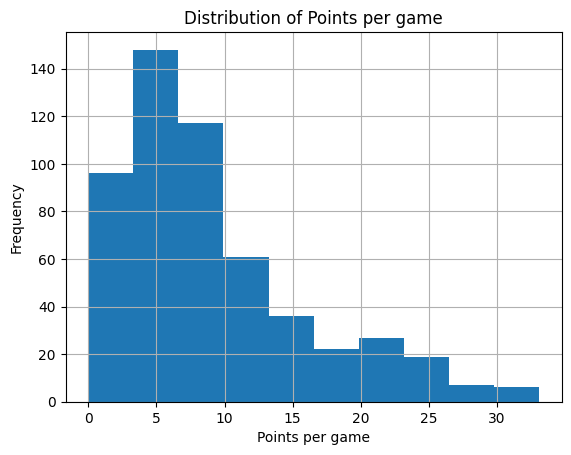

In [ ]:
#Most Points per game
games = player_values.groupby('PLAYER').GAMES.sum()
#games = player_values.loc[player_values.groupby('PLAYER').GAMES.sum().index != 0]
player_points = player_values.groupby('PLAYER').POINTS.sum()
ppg = player_points/games
ppg.sort_values(ascending= False).head()
#print(games)
#In this case Joel Embiid leads the way with 33.075758 ppg
ppg.hist()
plt.ylabel('Frequency')
plt.xlabel('Points per game')
plt.title('Distribution of Points per game')
print(ppg.sort_values(ascending=False))

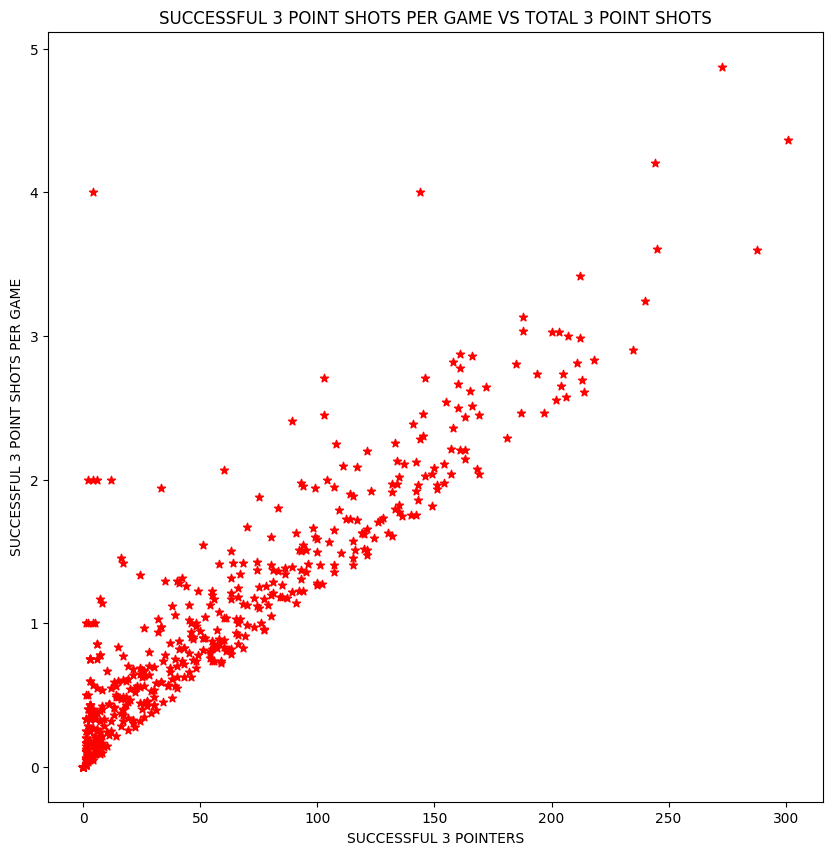

PLAYER
Stephen Curry           4.875000
Klay Thompson           4.362319
Damian Lillard          4.206897
Louis King              4.000000
LaMelo Ball             4.000000
                          ...   
Kostas Antetokounmpo         NaN
Lonzo Ball                   NaN
Lou Williams                 NaN
Tristan Thompson             NaN
Willie Cauley-Stein          NaN
Length: 555, dtype: float64
PLAYER
Klay Thompson       301
Buddy Hield         288
Stephen Curry       273
Donovan Mitchell    245
Damian Lillard      244
                   ... 
Rudy Gobert           0
Neemias Queta         0
Chris Silva           0
Tristan Thompson      0
Mason Plumlee         0
Name: THREE_POINT_MADE, Length: 555, dtype: int64


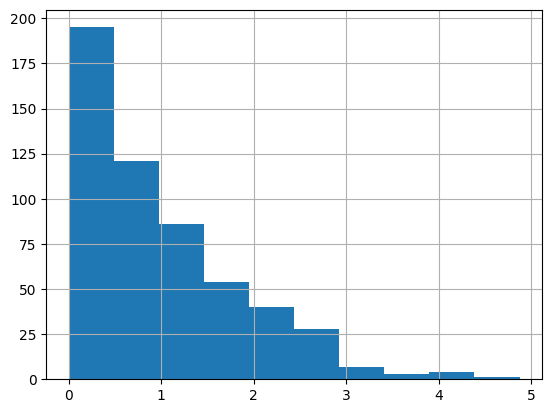

In [ ]:
#The best 3 point shooter award
#These Players scored the most three pointers
three_pt_made = player_values.groupby('PLAYER').THREE_POINT_MADE.sum()#Klay Thompson scored the most 3 point shots at 301
three_pt_attempted = player_values.groupby('PLAYER').THREE_POINT_ATT.sum()
three_pt_per_g = three_pt_made/games # Stephen Curry scores the most 3 point shots per game at 4.875 per game
three_pt_made.sort_values(ascending = False)
#The percentage overall success rate
three_pt_made/three_pt_attempted * 100

plt.figure(figsize = (10,10))
plt.scatter(three_pt_made, three_pt_per_g, marker= "*", c = 'red')
plt.xlabel('SUCCESSFUL 3 POINTERS')
plt.ylabel('SUCCESSFUL 3 POINT SHOTS PER GAME')
plt.title('SUCCESSFUL 3 POINT SHOTS PER GAME VS TOTAL 3 POINT SHOTS')
#plt.text(three_pt_attempted, three_pt_made, player_values['PLAYER'][0], size = 5)
plt.show()
three_pt_per_g.hist()
print(three_pt_per_g.sort_values(ascending=False))
print(three_pt_made.sort_values(ascending=False))


In [ ]:
three_pt_made.sort_values(ascending = False)

PLAYER
Klay Thompson       301
Buddy Hield         288
Stephen Curry       273
Donovan Mitchell    245
Damian Lillard      244
                   ... 
Rudy Gobert           0
Neemias Queta         0
Chris Silva           0
Tristan Thompson      0
Mason Plumlee         0
Name: THREE_POINT_MADE, Length: 555, dtype: int64

Freethrows made: PLAYER
Shai Gilgeous-Alexander    669
Joel Embiid                661
Trae Young                 566
Jayson Tatum               531
Luka Doncic                515
                          ... 
Donovan Williams             0
Sterling Brown               0
Devon Dotson                 0
Derrick Favors               0
Jordan Schakel               0
Name: FREE_THROWS_MADE, Length: 555, dtype: int64
Freethrows made per game: PLAYER
Joel Embiid                10.015152
Shai Gilgeous-Alexander     9.838235
Damian Lillard              8.793103
Giannis Antetokounmpo       7.904762
Luka Doncic                 7.803030
                             ...    
Kostas Antetokounmpo             NaN
Lonzo Ball                       NaN
Lou Williams                     NaN
Tristan Thompson                 NaN
Willie Cauley-Stein              NaN
Length: 555, dtype: float64


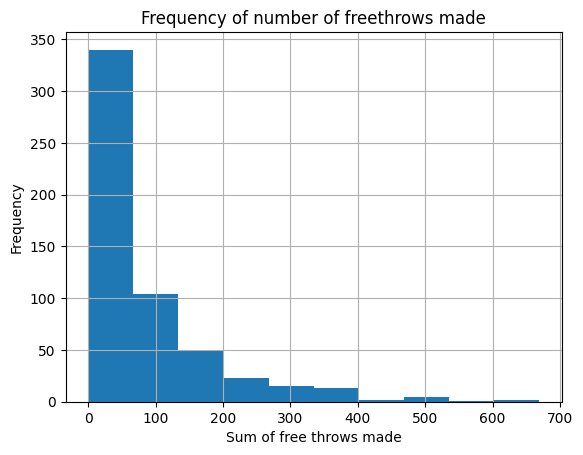

In [ ]:
#Best at FT
ft_made = player_values.groupby('PLAYER').FREE_THROWS_MADE.sum()
ft_per_game = player_values.groupby('PLAYER').FREE_THROWS_MADE.sum()/player_values.groupby('PLAYER').GAMES.sum()# Joel Embiid scores the most Frethrows per game of 10.015152
ft_made.sort_values(ascending = False) #Shai Gilgeous Alexander scores the most freethrows and he is an outlier in this metric

ft_made.hist()
plt.xlabel('Sum of free throws made')
plt.ylabel('Frequency')
plt.title('Frequency of number of freethrows made')
print(f'Freethrows made: {ft_made.sort_values(ascending = False)}', end='\n')
print(f'Freethrows made per game: {ft_per_game.sort_values(ascending = False)}')

Total rebounds : PLAYER
Domantas Sabonis     973
Nikola Vucevic       903
Nikola Jokic         817
Rudy Gobert          814
Jonas Valanciunas    804
                    ... 
D.J. Augustin          0
Collin Gillespie       0
Justin Lewis           0
Keaton Wallace         0
Jordan Schakel         0
Name: TOTAL_REBOUNDS, Length: 555, dtype: int64
Rebounds per game: PLAYER
Anthony Davis            12.535714
Domantas Sabonis         12.316456
Nikola Jokic             11.840580
Giannis Antetokounmpo    11.777778
Rudy Gobert              11.628571
                           ...    
Kostas Antetokounmpo           NaN
Lonzo Ball                     NaN
Lou Williams                   NaN
Tristan Thompson               NaN
Willie Cauley-Stein            NaN
Length: 555, dtype: float64


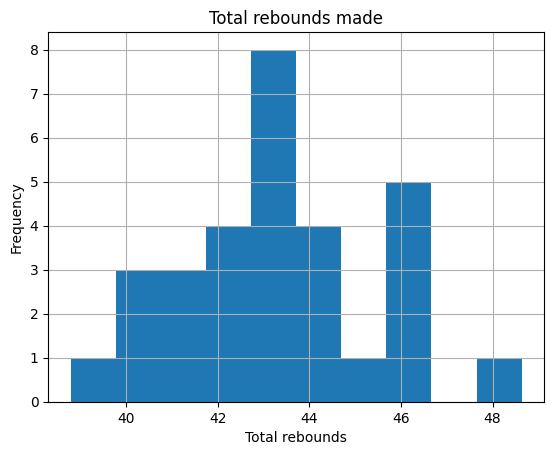

In [ ]:
#Best at Rebounds made
rebounds_made = player_values.groupby('PLAYER').TOTAL_REBOUNDS.sum() #Domantas Sabonis is ahead of the pack in rebounds made with 84 total rebounds
rebounds_per_game = player_values.groupby('PLAYER').TOTAL_REBOUNDS.sum()/player_values.groupby('PLAYER').GAMES.sum()#Anthony Davis has the best rebound per game ratio of 12.535714
rebounds.sort_values(ascending = False)

rebounds.hist()
plt.xlabel('Total rebounds')
plt.ylabel('Frequency')
plt.title('Total rebounds made')
print(f'Total rebounds : {rebounds_made.sort_values(ascending = False)}', end = '\n')
print(f'Rebounds per game: {rebounds_per_game.sort_values(ascending = False)}')

Total steals and blocks : PLAYER
Jaren Jackson Jr.       254
Nic Claxton             254
Brook Lopez             230
Walker Kessler          199
Anthony Edwards         183
                       ... 
Derrick Favors            0
Michael Foster            0
Dereon Seabron            0
Kostas Antetokounmpo      0
Trevor Keels              0
Length: 555, dtype: int64
Steals and blocks per game: PLAYER
Jaren Jackson Jr.       4.031746
Nic Claxton             3.342105
Anthony Davis           3.089286
Jacob Gilyard           3.000000
Brook Lopez             2.948718
                          ...   
Kostas Antetokounmpo         NaN
Lonzo Ball                   NaN
Lou Williams                 NaN
Tristan Thompson             NaN
Willie Cauley-Stein          NaN
Length: 555, dtype: float64


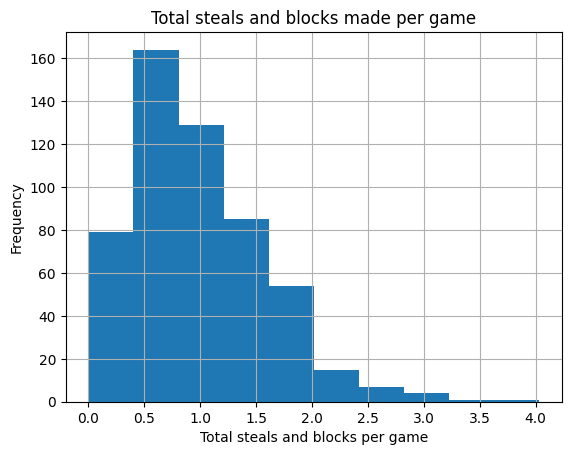

In [ ]:
#Who makes the most steals and Blocks
s_n_b_made = player_values.groupby('PLAYER').STEALS.sum() + player_values.groupby('PLAYER').BLOCKS.sum()  #Jaren Jackson Jr made 254 steals and rebounds in total
s_n_b_pg = (player_values.groupby('PLAYER').STEALS.sum() + player_values.groupby('PLAYER').BLOCKS.sum())/player_values.groupby('PLAYER').GAMES.sum() #Jaren Jackson Jr make the most steals and blocks per game
s_n_b_made.sort_values(ascending = False)

s_n_b_pg.hist()
plt.xlabel('Total steals and blocks per game')
plt.ylabel('Frequency')
plt.title('Total steals and blocks made per game')
print(f'Total steals and blocks : {s_n_b_made.sort_values(ascending = False)}', end = '\n')
print(f'Steals and blocks per game: {s_n_b_pg.sort_values(ascending = False)}')

Total turnovers : PLAYER
Trae Young           300
Anthony Edwards      259
Russell Westbrook    255
Jordan Poole         252
Nikola Jokic         247
                    ... 
Derrick Favors         0
Dereon Seabron         0
Deonte Burton          0
Tyler Dorsey           0
Jordan Schakel         0
Name: TURNOVERS, Length: 555, dtype: int64
Turnovers per game: PLAYER
Trae Young               4.109589
RaiQuan Gray             4.000000
Giannis Antetokounmpo    3.904762
LaMelo Ball              3.583333
Nikola Jokic             3.579710
                           ...   
Kostas Antetokounmpo          NaN
Lonzo Ball                    NaN
Lou Williams                  NaN
Tristan Thompson              NaN
Willie Cauley-Stein           NaN
Length: 555, dtype: float64


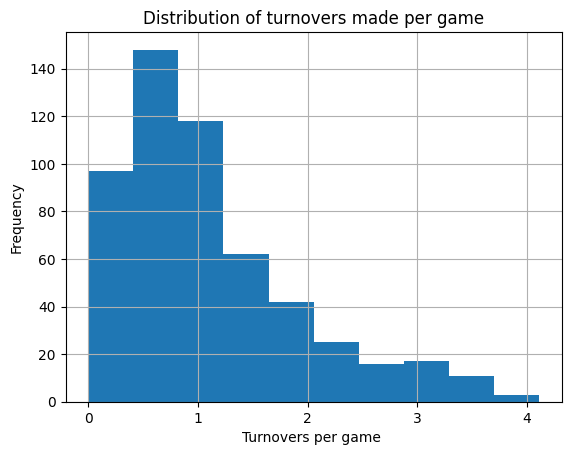

In [ ]:
#Best at Turnovers made
turnovers_made = player_values.groupby('PLAYER').TURNOVERS.sum() #Trae Young made a League high 300 overall turnovers
turnovers_per_game = player_values.groupby('PLAYER').TURNOVERS.sum()/player_values.groupby('PLAYER').GAMES.sum()#Trae has the best turnovers per game ratio of 4.109589
turnovers_per_game.hist()
plt.xlabel('Turnovers per game ')
plt.ylabel('Frequency')
plt.title('Distribution of turnovers made per game')
print(f'Total turnovers : {turnovers_made.sort_values(ascending = False)}', end = '\n')
print(f'Turnovers per game: {turnovers_per_game.sort_values(ascending = False)}')

Total minutes : PLAYER
Mikal Bridges           2963
Anthony Edwards         2846
Zach LaVine             2766
Julius Randle           2740
Nikola Vucevic          2740
                        ... 
Kostas Antetokounmpo       0
Danilo Gallinari           0
Chet Holmgren              0
Derrick Favors             0
Tristan Thompson           0
Name: MINUTES, Length: 555, dtype: int64
Minutes played per game: PLAYER
Jacob Gilyard           41.000000
Pascal Siakam           37.338028
Kyrie Irving            37.300000
Jayson Tatum            36.932432
James Harden            36.793103
                          ...    
Kostas Antetokounmpo          NaN
Lonzo Ball                    NaN
Lou Williams                  NaN
Tristan Thompson              NaN
Willie Cauley-Stein           NaN
Length: 555, dtype: float64


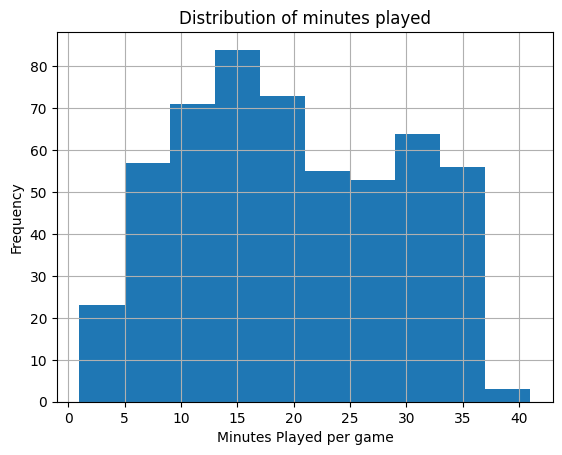

In [ ]:
#Most minutes played
mins = player_values.groupby('PLAYER').MINUTES.sum()
mins.sort_values(ascending=False)
#In this case Gary Mikal Bridges has 2963 minutes
mins_per_game = player_values.groupby('PLAYER').MINUTES.sum()/player_values.groupby('PLAYER').GAMES.sum()

mins_per_game.hist()
plt.xlabel('Minutes Played per game')
plt.ylabel('Frequency')
plt.title('Distribution of minutes played')
print(f'Total minutes : {mins.sort_values(ascending = False)}', end = '\n')
print(f'Minutes played per game: {mins_per_game.sort_values(ascending = False)}')
#Jacob Gilyard plays an average of 41 minutes per game
#player_values.PLAYER.value_counts()

Total triple doubles : PLAYER
Nikola Jokic             29.0
Domantas Sabonis         14.0
Luka Doncic              10.0
Ja Morant                 7.0
Giannis Antetokounmpo     6.0
                         ... 
Harrison Barnes           0.0
Hamidou Diallo            0.0
Greg Brown                0.0
Grayson Allen             0.0
Zion Williamson           0.0
Name: TRIPLE_DOUBLE, Length: 555, dtype: float64
Triple doubles per game: PLAYER
Nikola Jokic             0.420290
Domantas Sabonis         0.177215
Luka Doncic              0.151515
Ja Morant                0.114754
Giannis Antetokounmpo    0.095238
                           ...   
Kostas Antetokounmpo          NaN
Lonzo Ball                    NaN
Lou Williams                  NaN
Tristan Thompson              NaN
Willie Cauley-Stein           NaN
Length: 555, dtype: float64


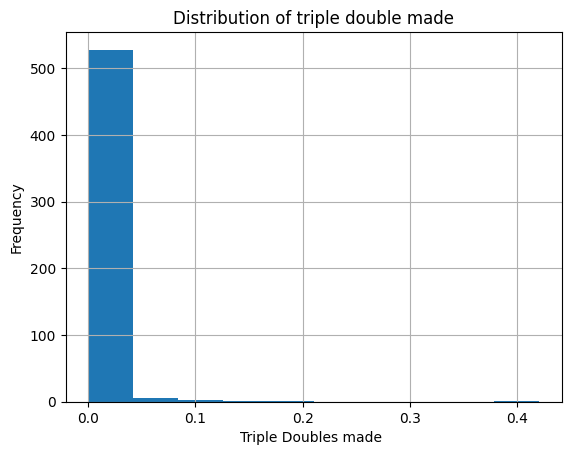

In [ ]:
#Most Triple Doubles


for index, row in player_values.iterrows():
  if row['POINTS'] >=10 and row['TOTAL_REBOUNDS'] >= 10 and row['ASSISTS'] >= 10:
    player_values.at[index,'TRIPLE_DOUBLE'] = 1
  else:
    player_values.at[index, 'TRIPLE_DOUBLE'] = 0

td_made = player_values.groupby('PLAYER').TRIPLE_DOUBLE.sum() #Nikola Jokic has 29 overall triple doubles
td_per_game = player_values.groupby('PLAYER').TRIPLE_DOUBLE.sum()/player_values.groupby('PLAYER').GAMES.sum()
Nikola = player_values.loc[player_values['PLAYER'] == 'Nikola Jokic']
td_per_game.hist()
plt.xlabel('Triple Doubles made ')
plt.ylabel('Frequency')
plt.title('Distribution of triple double made')
print(f'Total triple doubles : {td_made.sort_values(ascending = False)}', end = '\n')
print(f'Triple doubles per game: {td_per_game.sort_values(ascending = False)}')
#print(Nikola)

In [ ]:
#Basic_Possession = 0.96*[(Field Goal Attempts)+(Turnovers)+0.44*(Free Throw Attempts)-(Offensive Rebounds)]
regular_season['POSSESSION'] = 0.96*(regular_season['FIELD_GOALS_ATT'] + regular_season['TURNOVERS'] + 0.44*(regular_season['FREE_THROWS_ATT'])-regular_season['OFFENSIVE_REBOUNDS'])
possessions = regular_season.groupby('TEAM').POSSESSION.mean()
print(possessions.sort_values(ascending =False))
regular_season


TEAM
San Antonio Spurs         100.696507
Golden State Warriors     100.029659
Los Angeles Lakers        100.028254
Oklahoma City Thunder      99.891044
Indiana Pacers             99.809093
Minnesota Timberwolves     99.330498
Charlotte Hornets          99.319259
Memphis Grizzlies          99.310361
Atlanta Hawks              99.289756
Utah Jazz                  99.268683
Milwaukee Bucks            98.836449
Sacramento Kings           98.695024
Houston Rockets            97.970576
New Orleans Pelicans       97.674146
Detroit Pistons            97.634810
Orlando Magic              97.416585
Boston Celtics             97.210068
Washington Wizards         96.652332
Phoenix Suns               96.651395
Chicago Bulls              96.593795
Portland Trail Blazers     96.424273
Los Angeles Clippers       96.342790
Toronto Raptors            96.136741
New York Knicks            96.038400
Denver Nuggets             96.011239
Brooklyn Nets              95.506420
Dallas Mavericks           95.368

,GAME_CODE,TEAM_ID,TEAM,OPP_TEAM_ID,OPP,GD,FIELD_GOALS_MADE,FIELD_GOALS_ATT,THREE_POINT_MADE,THREE_POINT_ATT,...,TOTAL_REBOUNDS,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,ASSISTS,STEALS,BLOCKS,TURNOVERS,PERSONAL_FOULS,OUTCOME,POSSESSION
666,2484197,2,Boston Celtics,20,Philadelphia 76ers,2022-10-18,46,82,12,35,...,36,6,30,24,8,3,10,24,W,94.3872
903,2485061,9,Golden State Warriors,13,Los Angeles Lakers,2022-10-18,45,99,16,45,...,48,11,37,31,11,4,18,23,W,111.4752
801,2485061,13,Los Angeles Lakers,9,Golden State Warriors,2022-10-18,40,94,10,40,...,48,9,39,23,12,4,21,18,L,112.3200
695,2484197,20,Philadelphia 76ers,2,Boston Celtics,2022-10-18,40,80,13,34,...,31,4,27,16,8,3,14,25,L,98.2272
1412,2484955,11,Indiana Pacers,27,Washington Wizards,2022-10-19,39,97,15,42,...,42,12,30,21,7,5,15,20,L,104.8704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2485032,17,Brooklyn Nets,20,Philadelphia 76ers,2023-04-09,35,83,12,32,...,42,10,32,22,6,6,18,22,L,99.1872
124,2485358,12,Los Angeles Clippers,21,Phoenix Suns,2023-04-09,49,100,5,23,...,53,14,39,22,3,5,10,18,W,102.2976
126,2485358,21,Phoenix Suns,12,Los Angeles Clippers,2023-04-09,42,99,14,37,...,47,12,35,29,4,3,7,21,L,99.5328
70,2484404,14,Miami Heat,19,Orlando Magic,2023-04-09,45,83,18,44,...,44,7,37,30,10,3,18,20,W,98.6880


In [ ]:
#Offensive_Efficiency_Formula = 100*(Points/Possessions)
regular_season['EFFICIENCY'] = 100*(regular_season['POINTS']/regular_season['POSSESSION'])
efficiency = regular_season.groupby('TEAM').EFFICIENCY.mean()
print(efficiency.sort_values(ascending = False))

TEAM
Sacramento Kings          122.315917
Boston Celtics            121.565081
Philadelphia 76ers        121.469349
New York Knicks           120.906197
Denver Nuggets            120.699924
Dallas Mavericks          119.805809
Cleveland Cavaliers       119.659605
Atlanta Hawks             119.372055
Golden State Warriors     119.068625
Brooklyn Nets             118.849648
Milwaukee Bucks           118.393317
Utah Jazz                 118.017510
Los Angeles Clippers      117.948639
Memphis Grizzlies         117.815979
Portland Trail Blazers    117.735923
Phoenix Suns              117.652601
Oklahoma City Thunder     117.631868
Toronto Raptors           117.566359
Los Angeles Lakers        117.336381
Chicago Bulls             117.286849
New Orleans Pelicans      117.220301
Washington Wizards        117.192153
Minnesota Timberwolves    116.661062
Indiana Pacers            116.605520
Miami Heat                115.971316
Orlando Magic             114.428848
Houston Rockets           113.044

In [ ]:
#PACE
def calculate_pace(row):
    home_game_code = row['GAME_CODE']
    away_team = row['OPP']
    opponent_row = regular_season[(regular_season['GAME_CODE'] == home_game_code) & (regular_season['TEAM'] == away_team)]
    away_possession = opponent_row['POSSESSION'].iloc[0] if not opponent_row.empty else 0
    pace = ((row['POSSESSION'] + away_possession) / 2)
    return pace

regular_season['PACE'] = regular_season.apply(calculate_pace, axis=1)

print(regular_season.groupby('TEAM').PACE.mean())

TEAM
Atlanta Hawks              99.246205
Boston Celtics             97.439298
Brooklyn Nets              96.123863
Charlotte Hornets          99.348995
Chicago Bulls              96.926985
Cleveland Cavaliers        94.127298
Dallas Mavericks           95.410654
Denver Nuggets             96.074927
Detroit Pistons            97.552390
Golden State Warriors     100.142517
Houston Rockets            97.394107
Indiana Pacers             99.192351
Los Angeles Clippers       96.318205
Los Angeles Lakers         99.961288
Memphis Grizzlies          99.379902
Miami Heat                 94.570068
Milwaukee Bucks            98.959844
Minnesota Timberwolves     99.377561
New Orleans Pelicans       97.653073
New York Knicks            96.264585
Oklahoma City Thunder      99.787083
Orlando Magic              97.496195
Philadelphia 76ers         95.405502
Phoenix Suns               96.579980
Portland Trail Blazers     96.468995
Sacramento Kings           98.741151
San Antonio Spurs         100.200

In [ ]:
#PLAYER EFFICIENCY
#(POINTS + REBOUNDS + ASSISTS +STEALS + BLOCKS +FOULS DRAWN )- (MISSED FIELD GOALS + MISSED FREE THROWS + TURNOVERS + SHOTS REJECTED + FOULS COMMITTED)
